In [180]:
# Kaggle
# kaggle datasets download -d ukveteran/mortality-and-water-hardness
laptop_src = "laptops.csv"
spec_cpu = "data_cleaned.csv"
# Пользовательский путь
creds_path = "/content/drive/MyDrive/Продвинутые методы машинного обучения/Индивидуальное задание по модулю Визуализация данных/source/"


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Задание-проект

## Рекомендации выполнения задания

- Все пункты выполнять в самостоятельно созданном Python-ноутбуке, который будет являться результатом вашей работы. После выполнения заданий вы сдадите готовый ноутбук на проверку;
- Следовать пунктам задания, поясняя выполняемые действия текстом;
- Делать выводы по результатам анализа — один из критериев оценки работы;
- В местах, где возникнут трудности и вопросы, написать пояснение в ноутбуке — что за сложность и в чем она проявляется.




## 1. Выбор датасета для задания:

Для выполнения задания выбран [Список лэптопов с параметрами для выбора:](https://www.kaggle.com/datasets/rajugc/laptop-selection-dataset);

В целях нормирования показателей в контекст задания добавил набор данных со спецификайцией процессоров [CPU Specifications Dataset](https://www.kaggle.com/datasets/lincolnzh/cpu-specifications-dataset) .

**Цель:** мы хотим выпустить ноутбук, но для этого нужно понимать оптимальные параметры для него. Следовательно, основываясь на пользовательском рейтинге, нам нужно выбрать оптимальную ОС, размер хранилища и т. п.

**Гипотеза:** если мы выпустим ноутбук с наиболее востребованными характеристиками, то он будет лучше продаваться.

### Описание laptop-selection-dataset
  Sl - Порядковый номер записи

  img_link - Ссылка на изображение ноутбука

  name - Название ноутбука

  priceRs - Цена ноутбука в индийских рупиях

  processor - Процессор ноутбука

  ram - Оперативная память ноутбука

  os - ОС ноутбука

  storage - Общий размер жесткого диска ноутбука

  display(in inch) - Размер дисплея в дюймах

  rating - Пользовательский рейтинг ноутбука

  no_of_ratings - количество оценок

  no_of_reviews - количество обзоров



In [245]:
import pandas as pd
import numpy as np
from datetime import datetime
#dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
#train = pd.read_csv(kaggle_creds_path+"/kaggle_data/train_sample.csv", parse_dates=['pickup_datetime', 'dropoff_datetime'], date_parser=dateparse) # Тестовый набор данных 500 записей
df = pd.read_csv(creds_path + laptop_src)
#df_extra = pd.read_csv(creds_path + spec_cpu, parse_dates=['date'], date_parser=dateparse)

# Переименуем поле price(in Rs.) в priceRs
df = df.rename(columns = {'price(in Rs.)':'priceRs', 'display(in inch)': 'disp'})
df['priceRs'] = df['priceRs'].astype(float)
# Добавим поля: brand(производитель ноутбука), model(наименование ноутбука)
df[['brand', 'model']] = df['name'].str.split(" ", n=1, expand = True).astype('str')

# Добавим поле cpu_model(модель процессора) и cpu_gen(поколение процессора)
df[['cpu_model', 'cpu_gen']] = df['processor'].str.split("Processor", n=2, expand = True).astype('str')

# Добавим поля ram_gb(Объем ОЗУ), ram_type (тип памяти - DDR4, DDR5 и пр.)
df[['ram_gb', 'tmp2', 'ram_type', 'tmp3', 'tmp4']]= df['ram'].str.split(' ', n=4, expand = True)
df['ram_gb'] = pd.to_numeric(df['ram_gb'], errors='coerce').fillna(0)

# Добавим поле storage_gb(объем жесткого дитска в ГБ)
df[['storage_gb', 'tmp2', 'tmp1', 'tmp3', 'tmp4']] = df['storage'].str.split(' ', n=4, expand = True)
df['storage_gb'] = pd.to_numeric(df['storage_gb'], errors='coerce').fillna(0)
df['storage_gb'] = df['storage_gb'].where(df['storage_gb'] >10, df['storage_gb'] * 1024)

# Очистим Набор данных от временных полей, поля с наименованием операционной системы 'os' и полей , которые подверглись преобразованиям
df = df.drop(['tmp4','tmp2','tmp3','tmp1'], axis=1)
df = df.drop(['img_link', 'name','ram', 'os', 'storage', 'processor'], axis=1)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     984 non-null    int64  
 1   priceRs        984 non-null    float64
 2   disp           984 non-null    float64
 3   rating         688 non-null    float64
 4   no_of_ratings  688 non-null    float64
 5   no_of_reviews  688 non-null    float64
 6   brand          984 non-null    object 
 7   model          984 non-null    object 
 8   cpu_model      984 non-null    object 
 9   cpu_gen        984 non-null    object 
 10  ram_gb         984 non-null    int64  
 11  ram_type       984 non-null    object 
 12  storage_gb     984 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 100.1+ KB


In [247]:
df.sample(6)

,Unnamed: 0,priceRs,disp,rating,no_of_ratings,no_of_reviews,brand,model,cpu_model,cpu_gen,ram_gb,ram_type,storage_gb
210,210,46990.0,14.0,4.2,12.0,2.0,ASUS,Vivobook 14 (2022) Core i3 12th Gen,Intel Core i3,(12th Gen),8,DDR4,512.0
404,404,250000.0,15.6,4.0,5.0,2.0,ALIENWARE,Core i7 10th Gen,Intel Core i7,(10th Gen),16,DDR4,1024.0
729,729,99990.0,13.3,4.3,30.0,7.0,ASUS,ZenBook S Core i7 8th Gen,Intel Core i7,(8th Gen),16,DDR3,512.0
257,257,63990.0,15.6,4.5,313.0,31.0,acer,Nitro 5 Ryzen 5 Hexa Core 5600H,AMD Ryzen 5 Hexa Core,,16,DDR4,512.0
301,301,129989.0,16.0,4.7,32.0,5.0,Lenovo,Legion 5 Pro Ryzen 7 Octa Core 5800H,AMD Ryzen 7 Octa Core,,16,DDR4,1024.0
373,373,247990.0,13.4,NaN,NaN,NaN,ASUS,ROG Flow X13 (2022) with Radeon RX 6850M XT eG...,AMD Ryzen 7 Octa Core,,16,LPDDR5,1024.0


## 2. Проверка качества данных:

- Проверьте типы данных колонок и приведите их к нужному типу (например, даты к типу datetime).

- Проверьте наличие пропущенных значений и обработайте их (например, заполните по какому-либо принципу или удалите строки с пропущенными значениями).

- Проверьте данные на наличие дубликатов, и, если необходимо, вычистите их.


In [248]:
df.drop_duplicates()

,Unnamed: 0,priceRs,disp,rating,no_of_ratings,no_of_reviews,brand,model,cpu_model,cpu_gen,ram_gb,ram_type,storage_gb
0,0,62990.0,15.6,4.5,14.0,1.0,Lenovo,Intel Core i5 11th Gen,Intel Core i5,(11th Gen),16,DDR4,512.0
1,1,37500.0,15.6,4.4,53.0,3.0,Lenovo,V15 G2 Core i3 11th Gen,Intel Core i3,(11th Gen),8,DDR4,1024.0
2,2,49990.0,15.6,4.4,4733.0,463.0,ASUS,TUF Gaming F15 Core i5 10th Gen,Intel Core i5,(10th Gen),8,DDR4,512.0
3,3,33990.0,15.6,4.3,10406.0,1040.0,ASUS,VivoBook 15 (2022) Core i3 10th Gen,Intel Core i3,(10th Gen),8,DDR4,512.0
4,4,18990.0,14.0,3.8,18.0,3.0,Lenovo,Athlon Dual Core,AMD Athlon Dual Core,,4,DDR4,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,979,37990.0,15.6,4.0,1907.0,227.0,ASUS,VivoBook 15 Core i3 10th Gen,Intel Core i3,(10th Gen),8,DDR4,1024.0
980,980,22670.0,11.6,3.8,5991.0,687.0,HP,Chromebook MediaTek Kompanio 500,MediaTek MediaTek Kompanio 500,,4,LPDDR4X,1024.0
981,981,54990.0,14.0,4.5,22.0,5.0,ASUS,Ryzen 5 Hexa Core,AMD Ryzen 5 Hexa Core,,8,DDR4,512.0
982,982,40990.0,15.6,4.0,801.0,104.0,DELL,Inspiron Core i3 11th Gen,Intel Core i3,(11th Gen),8,DDR4,1024.0


In [249]:
df[df.isnull().any(1)]

,Unnamed: 0,priceRs,disp,rating,no_of_ratings,no_of_reviews,brand,model,cpu_model,cpu_gen,ram_gb,ram_type,storage_gb
7,7,36890.0,14.0,NaN,NaN,NaN,DELL,Vostro Ryzen 3 Quad Core 5425U,AMD Ryzen 3 Quad Core,,8,DDR4,256.0
53,53,131990.0,13.6,NaN,NaN,NaN,APPLE,2022 MacBook AIR M2,Apple M2,,8,Unified,512.0
58,58,74990.0,14.0,NaN,NaN,NaN,ASUS,ZenBook Duo 14 (2021) Touch Panel Core i5 11th...,Intel Core i5,(11th Gen),8,LPDDR4X,512.0
64,64,89990.0,14.0,NaN,NaN,NaN,HP,Pavilion Core i7 12th Gen,Intel Core i7,(12th Gen),16,DDR4,1024.0
72,72,399990.0,17.0,NaN,NaN,NaN,MSI,Core i9 13th Gen,Intel Core i9,(13th Gen),32,DDR5,2048.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,971,36890.0,14.0,NaN,NaN,NaN,DELL,Vostro Ryzen 3 Quad Core 5425U,AMD Ryzen 3 Quad Core,,8,DDR4,256.0
972,972,99999.0,15.6,NaN,NaN,NaN,HP,Envy x360 Creator OLED Intel Evo Core i5 12th Gen,Intel Core i5,(12th Gen),16,DDR4,512.0
975,975,205000.0,17.3,NaN,NaN,NaN,MSI,Vector GP66 Core i7 12th Gen,Intel Core i7,(12th Gen),16,DDR5,1024.0
977,977,67500.0,15.6,NaN,NaN,NaN,DELL,Core i5 11th Gen,Intel Core i5,(11th Gen),16,DDR4,512.0


In [250]:
# Создадим набор данных df_rating, очистив исходный набор df - удалены строки в которых не заполнены поля rating, no_of_ratings 	no_of_reviews
df_rating = df.dropna()

<Figure size 1000x600 with 0 Axes>

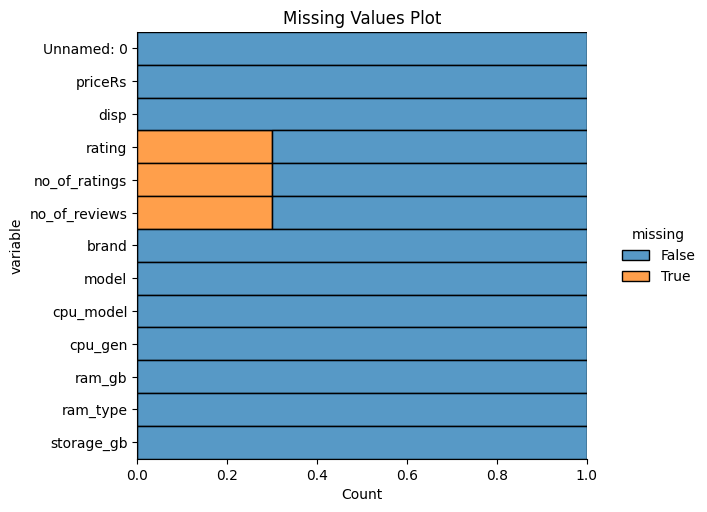

In [251]:
def plot_missing_values(df: pd.DataFrame,
                        title="Missing Values Plot"):
    plt.figure(figsize=(10, 6))

    sns.displot(
        data=df.isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        aspect=1.25
    )
    plt.title(title)
    plt.show()

plot_missing_values(df)

<Figure size 1000x600 with 0 Axes>

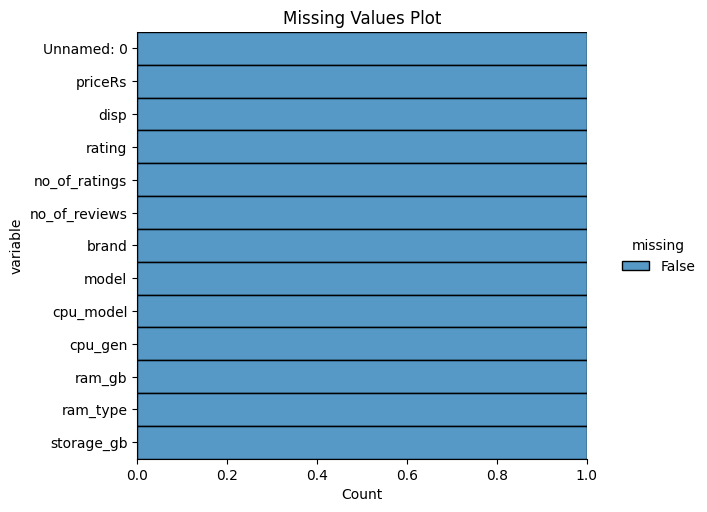

In [252]:
plot_missing_values(df_rating)

## 3. Рассчет основных статистических показателей

Рассчитайте основные статистические показатели для числовых переменных, такие как среднее, медиана и стандартное отклонение.

Другие статистические показатели также могут быть рассчитаны в зависимости от конкретных целей и задач анализа данных.

Сделайте вывод по результатам.

Постройте графики, которые считаете наиболее релевантными для анализа данных.

Графики должны быть информативными и помочь вам лучше понять данные. При необходимости введите дополнительные колонки в исходный датафрейм.

После построения графиков проанализируйте полученные результаты и сделайте выводы (например, какие данные имеют наибольшую значимость, какие переменные влияют на результаты). Если это необходимо доработайте с данными на этом этапе.




In [266]:
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from vega_datasets import data
alt.themes.enable('dark')
alt.data_transformers.disable_max_rows()
#alt.warnings.simplefilter(action='ignore')

# Если графики не отображаются, попробуйте поменять рендерер на html
#alt.renderers.enable("mimetype");
alt.renderers.enable("html");


In [254]:
df_rating.describe()

,Unnamed: 0,priceRs,disp,rating,no_of_ratings,no_of_reviews,ram_gb,storage_gb
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,453.928779,66437.473837,15.184942,4.284884,718.091570,83.898256,10.540698,597.395349
std,290.398881,40936.347731,1.411119,0.330239,1750.817825,211.596726,4.637494,271.233627
min,0.000000,15990.000000,11.600000,1.600000,1.000000,0.000000,4.000000,0.000000
25%,193.750000,40355.000000,14.000000,4.100000,14.000000,2.000000,8.000000,512.000000
50%,432.500000,56049.000000,15.600000,4.300000,90.000000,11.000000,8.000000,512.000000
75%,711.250000,74990.000000,15.600000,4.500000,453.000000,53.500000,16.000000,512.000000
max,982.000000,345390.000000,35.000000,5.000000,15492.000000,2054.000000,32.000000,2048.000000


In [284]:
selection = alt.selection_multi(fields=['cpu_model'], bind='legend')

chart1 = alt.Chart(
    df_rating
).mark_bar(
).add_selection(
    selection
).encode(
    x=alt.X('brand', sort='-y', title='Наименование производителя'),
    y=alt.Y('mean(priceRs)', axis=alt.Axis(grid=True), title='Средняя стоимость модели ноутбука'),
    color=alt.condition(selection, 'cpu_model', alt.ColorValue('darkgrey')),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.3))
).properties(
    width=1200
)

chart1

alt.Chart(...)

In [286]:
selection = alt.selection_multi(fields=['brand'], bind='legend')

chart2 = alt.Chart(
    df_rating
).mark_bar(
).add_selection(
    selection
).encode(
    x=alt.X('brand', sort='-y', title='Наименование производителя'),
    y=alt.Y('mean(priceRs)', axis=alt.Axis(grid=True), title='Средняя стоимость модели ноутбука'),
    color=alt.condition(selection, 'brand', alt.ColorValue('darkgrey')),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.3))
).properties(
    width=1200
)

#alt.vconcat(chart2, chart1)
chart2

alt.Chart(...)

In [289]:
selection = alt.selection_multi(fields=['cpu_model'], bind='legend')

chart3 = alt.Chart(
    df_rating
).mark_bar(
).add_selection(
    selection
).encode(
    x=alt.X('rating', sort='-y', title='Пользовательский рэйтинг'),
    y=alt.Y('mean(priceRs)', axis=alt.Axis(grid=True), title='Средняя стоимость модели ноутбука'),
    color=alt.condition(selection, 'cpu_model', alt.ColorValue('darkgrey')),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.6))
).properties(
    width=1200
)

#alt.vconcat(chart2, chart1)
chart3

alt.Chart(...)

## 4. Корреляционный анализ

Вычислите матрицу корреляции и постройте heatmap для нее.



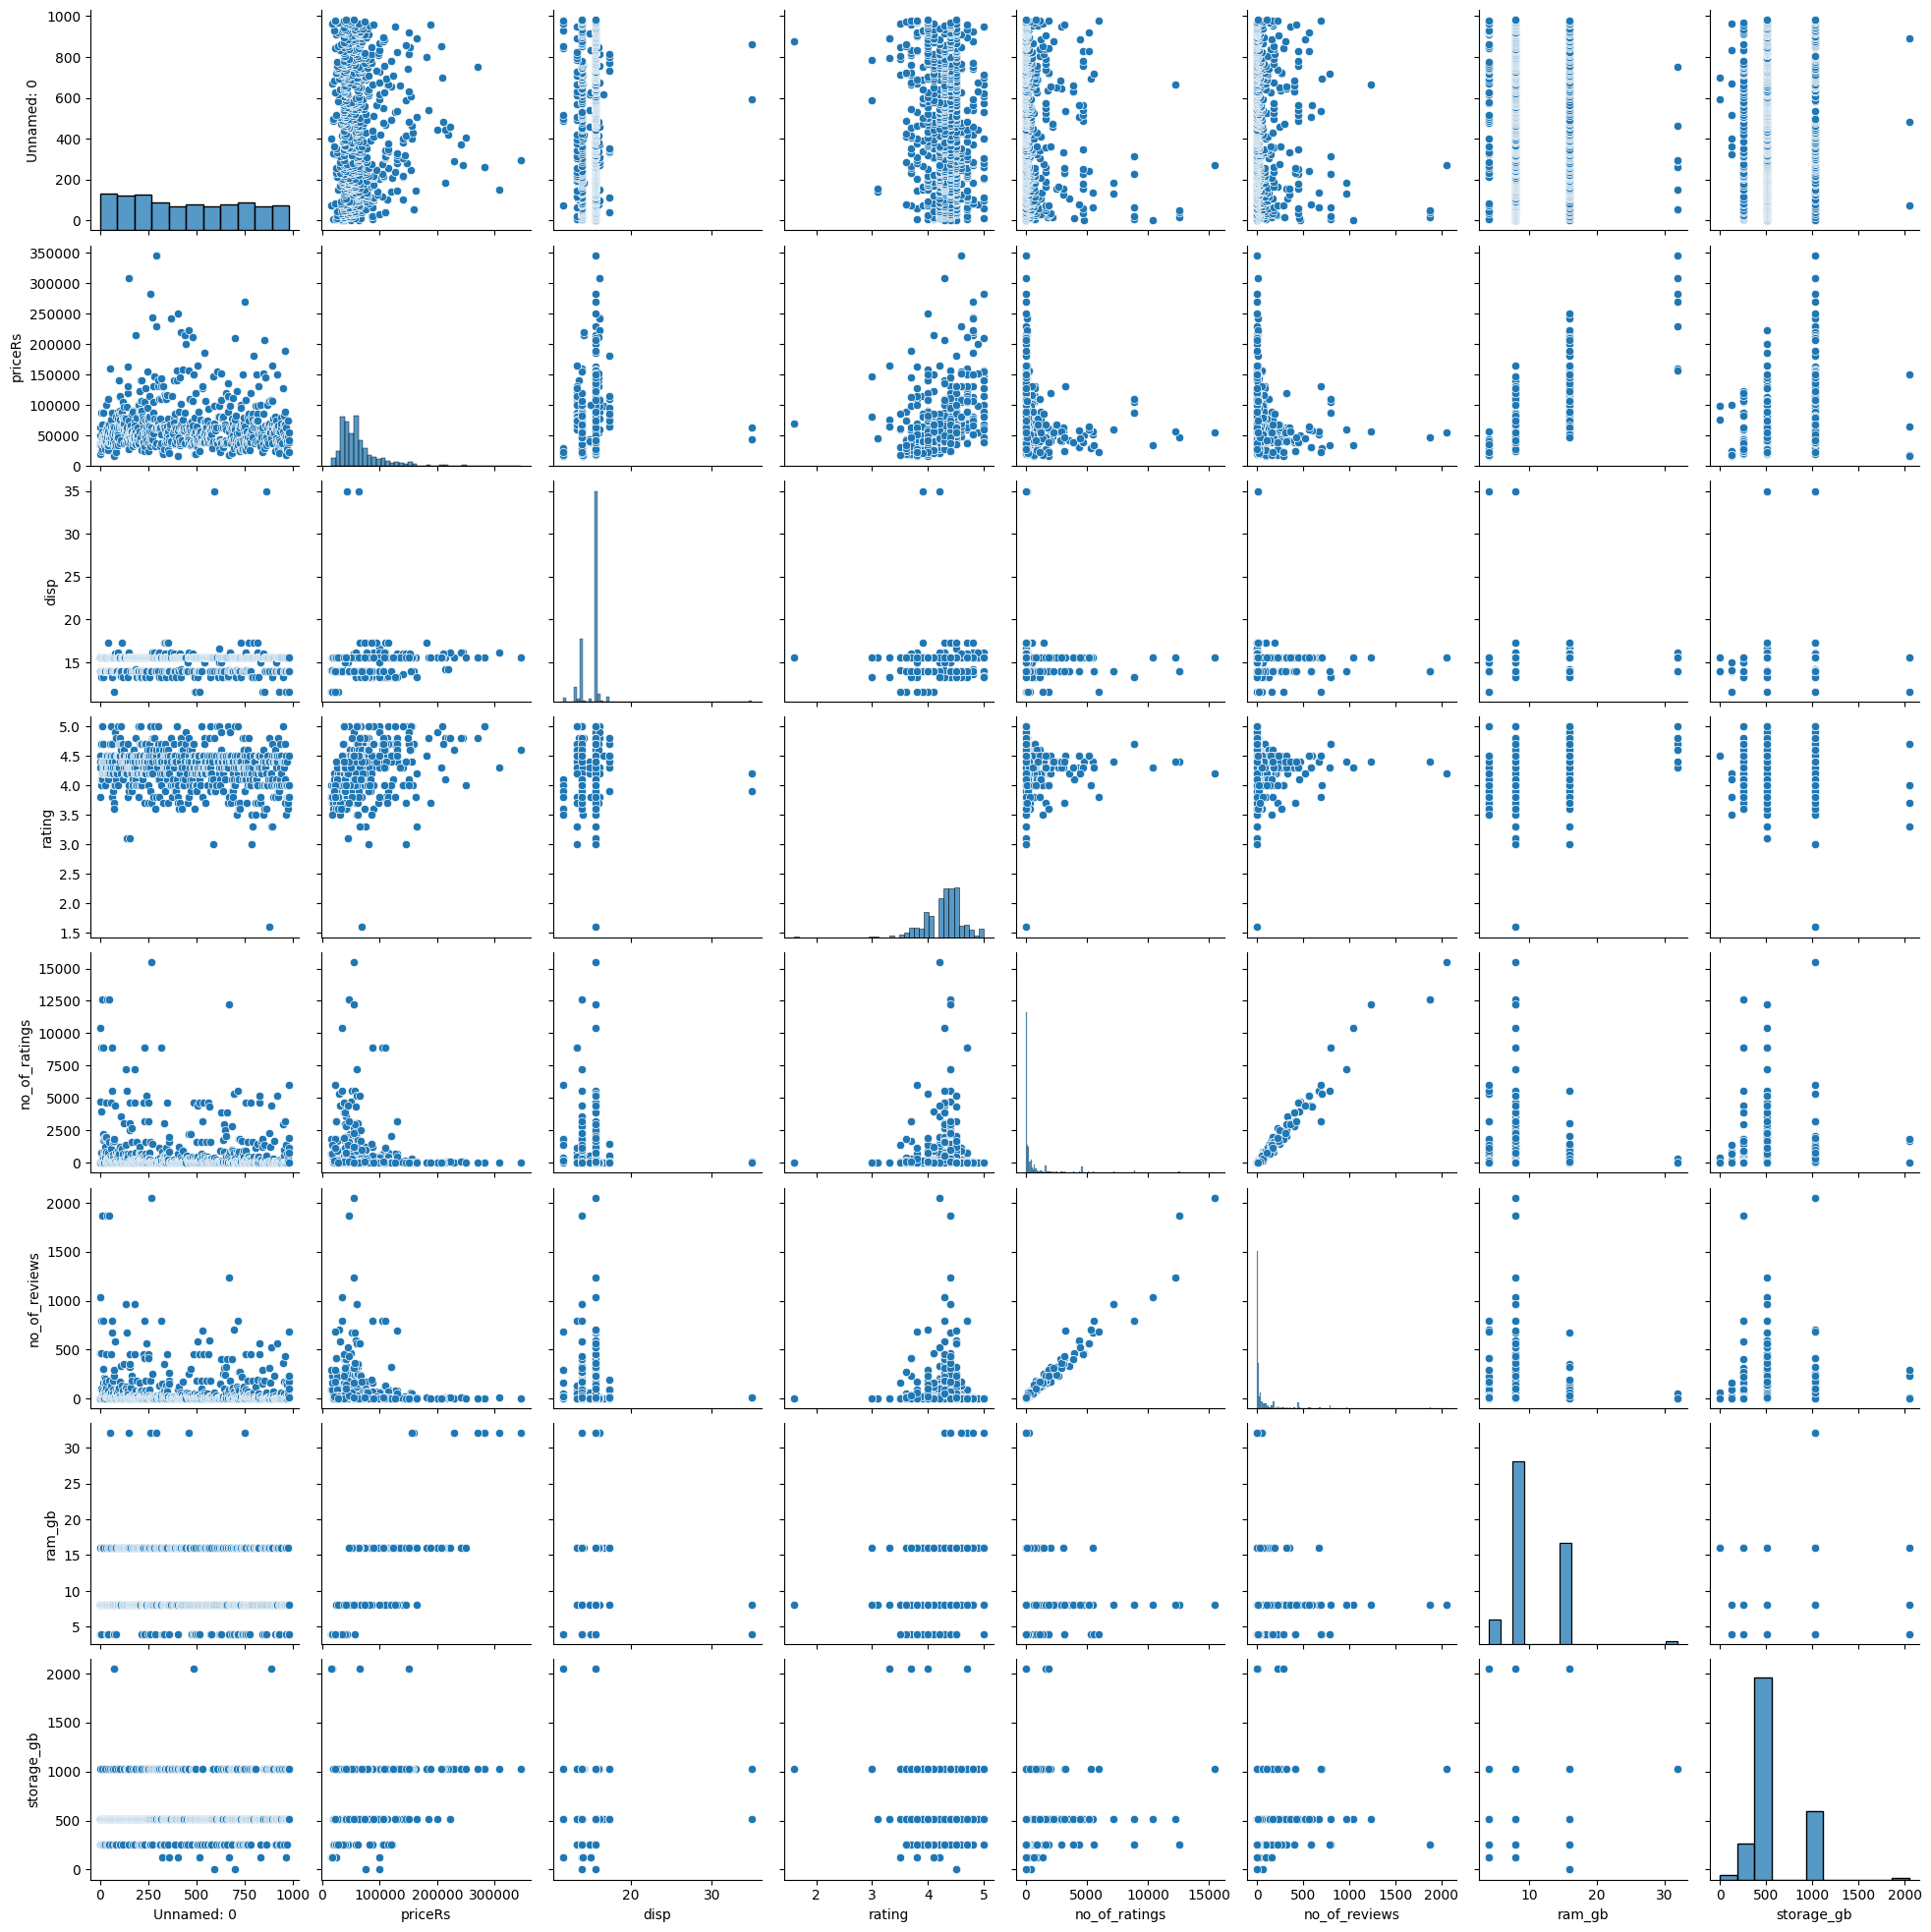

In [290]:
sns.pairplot(df_rating)

<ipython-input-107-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

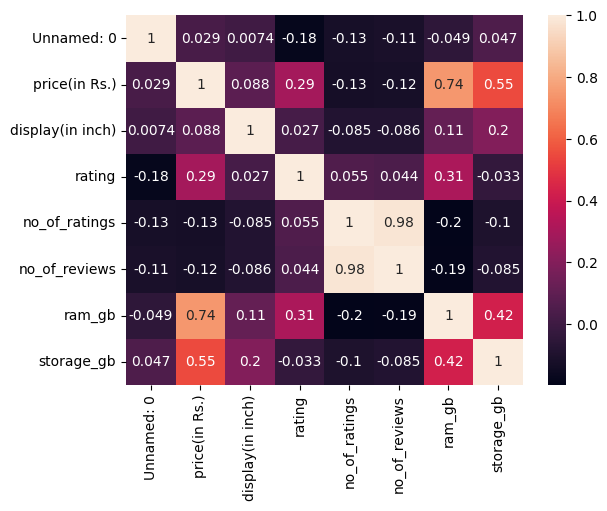

In [107]:
sns.heatmap(df.corr(), annot=True)

## 5. Заключение - выводы и варианты использования исследования

Сделайте выводы о взаимосвязях, обнаруженных в данных.

Сделайте общий вывод по исследуемому датасету. Предложите возможные способы применения полученных результатов анализа данных.

Исследуемый массив подходит для предварительного разведочного анализа локального рынка: достаточно сильно коррелируют параметры Объем оперативной памяти и стоимость Ноутбука, при этом объем жесткого диска имеет меньшее влияние на стоимость.

Сильная корреляция количества обзоров и оценок  очевидна - источник данных коммерческий.

Возможно добавление в исследуемый набор показателей уровня жизни, образования и возраста добавит ярких открытий и поможет выявить более ясные закономерности.